In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [2]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

## Accuracy of Models

In [3]:
accuracy = [91.19, 91.23, 93.04, 87.28, 90.85, 65.00, 53.61]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S', 'Custom CNN']

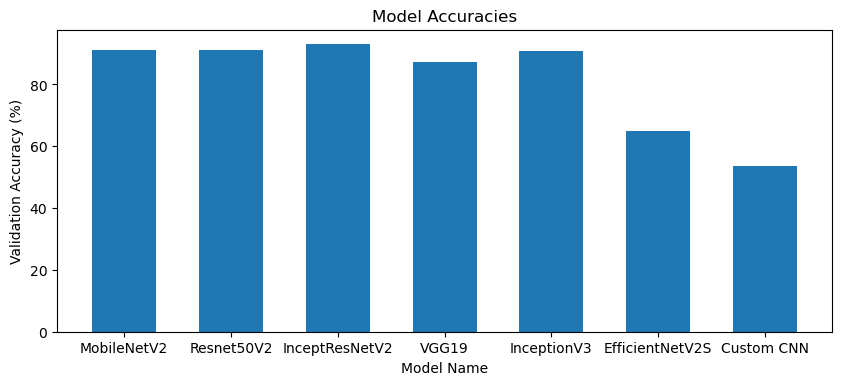

In [4]:
#------------------------------------------------------------
# Plot for the model accuracies
#------------------------------------------------------------
plt.bar(model, accuracy, 0.6)
plt.xlabel('Model Name')
plt.ylabel('Validation Accuracy (%)')
plt.title('Model Accuracies')
plt.show()

## FP32 Precision Load

In [5]:
# Load time for model on various devices

CPU       = [0.1163, 0.2501, 0.6670, 0.1445, 0.2848, 0.4572]
GPU       = [4.4413, 6.4578, 16.5807, 4.6860, 7.9319, 12.3654]
NCS2      = [2.0132, 2.1107, 3.6791, 2.0608, 2.0712, 3.2036]
NCS2_Rasp = [8.1615, 8.4460, 24.7394, 8.2744, 8.6501, 19.5176]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

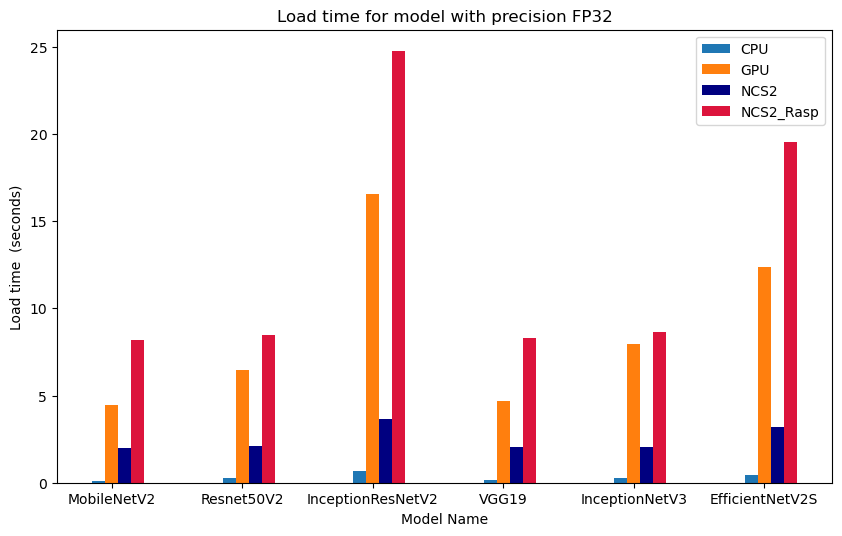

In [6]:
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3

#------------------------------------------------------------
# Plot for FP32 Precision model
#------------------------------------------------------------
plt.bar(X_axis1, CPU, 0.1, label='CPU')
plt.bar(X_axis2, GPU, 0.1, label='GPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')


plt.xlabel('Model Name')
plt.ylabel('Load time  (seconds)')
plt.title('Load time for model with precision FP32')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

## FP16 Precision

In [7]:
CPU       = [0.0699, 0.1686, 0.4907, 0.1019, 0.2049, 0.3893]
GPU       = [3.7681, 5.4119, 15.6516, 4.5191, 7.6198, 12.1733]
NCS2      = [1.9324, 1.9495, 3.3887, 2.0201, 2.0505, 3.0130]
NCS2_Rasp = [6.8928, 6.8800, 19.0833, 7.7566, 7.0261, 19.0142]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

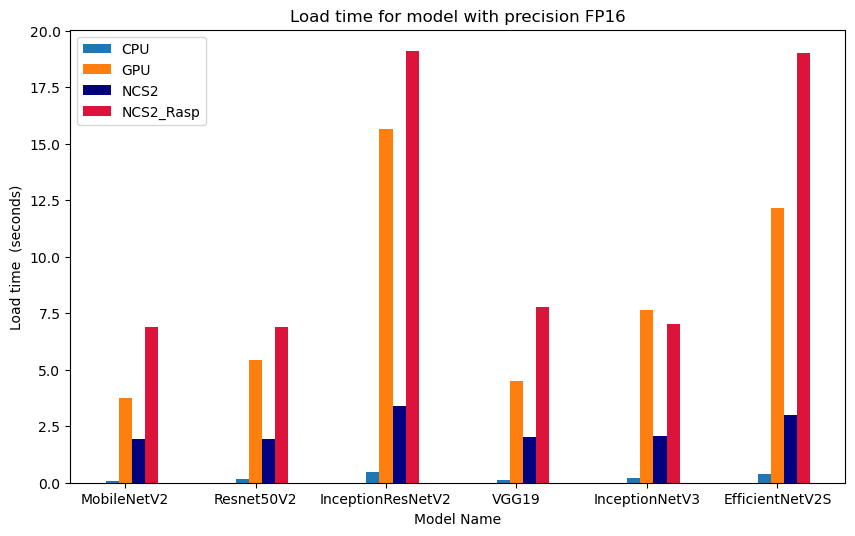

In [8]:
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3

#------------------------------------------------------------
# Plot for FP16 Precision model
#------------------------------------------------------------
plt.bar(X_axis1, CPU, 0.1, label='CPU')
plt.bar(X_axis2, GPU, 0.1, label='GPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')


plt.xlabel('Model Name')
plt.ylabel('Load time  (seconds)')
plt.title('Load time for model with precision FP16')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()